In [173]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [179]:
ruta=r'https://raw.githubusercontent.com/lasheralberto/data/main/Ejercicio1.csv'
df=pd.read_csv(ruta,delimiter=';')

df.head()

,SALARIO,CLIENTE,EDAD,HIJOS,CREDITO
0,Poco,Si,Joven,Uno,NO
1,Mucho,Si,Joven,Uno,SI
2,Mucho,Si,Joven,Uno,SI
3,Poco,Si,Joven,Uno,NO
4,Mucho,Si,Joven,Dos,SI


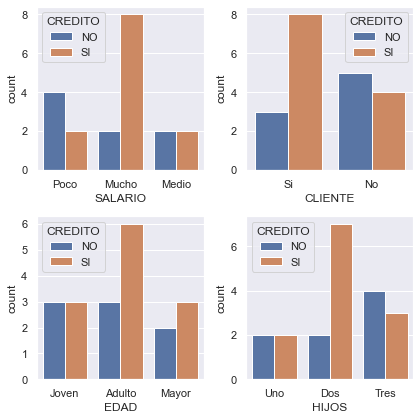

In [175]:
def count_plot(df, columns):
    plt.figure(figsize=(6, 6))
    for indx, var  in enumerate(columns):
        plt.subplot(2, 2, indx+1)
        g = sns.countplot(df[var], hue= df['CREDITO'])
    plt.tight_layout()


features = df.columns.tolist()
features.remove('CREDITO')
features 
count_plot(df,features)   

In [176]:
#WE CALCULATE HERE THE PERCENTAGE OF THE LABELS IN EACH CATEGORY. THOSE BELOW 0.2 ARE CONSIDERED RARE LABELS
for var in features:
    print(df[var].value_counts().sort_values(ascending=False) / df.shape[0])
    print('=' * 30)
    print()

Mucho    0.5
Poco     0.3
Medio    0.2
Name: SALARIO, dtype: float64

Si    0.55
No    0.45
Name: CLIENTE, dtype: float64

Adulto    0.45
Joven     0.30
Mayor     0.25
Name: EDAD, dtype: float64

Dos     0.45
Tres    0.35
Uno     0.20
Name: HIJOS, dtype: float64



Dividing the datset into train and test. If the model is tested on which it is trained, it gives good result. But, when it is used to predict the data in future it may not give that much accuracy. So, Keeping some data a side for testing which can be used later for evaluating the model.



In [177]:
def append_newdata(salario,cliente,edad,hijos,credito):
    global df
    salario=f'{salario}'
    cliente=f'{cliente}'
    edad=f'{edad}'
    hijos=f'{hijos}'
    credito=f'{credito}'

    df=df.append(pd.DataFrame([[salario,cliente,edad,hijos,credito]],columns=df.columns))
    return df

#appending the new data to see how the model works with it
def nbayes(Y):
    missclassi=[]
    append_newdata('Mucho','Si','Adulto','Cuatro','NO')
    for i in df[features]:
        if isinstance(i,str):
            print('All the variables are categorical, carry on!')
    
    encoder = OrdinalEncoder()
    data_encoded = encoder.fit_transform(df[features])
    df_encoded = pd.DataFrame(data_encoded, columns=features)
          

#label encoder will be used to encode the target values CREDITO
    encode = LabelEncoder()
    target_encoded = encode.fit_transform(df[Y])
    df_encoded[Y] = target_encoded
    df_encoded.head()

#VIF is less than 5, features are not correlated. The naive assumption is correct
    
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(df_encoded.values, i) for i in range(len(features))]
    vif["Features"] = features

    for i in vif["VIF"]:
        if i<=5:
            pass
        else:
            print('There is Multicolinearity')
            break
            print(vif[i])

    X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(Y, axis=1), df_encoded[Y], test_size=0.4, random_state=143)
    cnb = CategoricalNB()
    cnb.fit(X_train, y_train)

    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

#for categorical NB
    y_pred_cnb = cnb.predict(X_test)
    y_prob_pred_cnb = cnb.predict_proba(X_test)
# how did our model perform?
    count_misclassified = (y_test != y_pred_cnb).sum()

    if any(y_test != y_pred_cnb):
        missclassi.append(y_test)
    

    print("CategoricalNB \n")
    print("=" * 30)
    print('Misclassified samples: {}'.format(count_misclassified))
    accuracy = accuracy_score(y_test, y_pred_cnb)
    print('Accuracy: {:.2f}'.format(accuracy))


#for categorical NB
    print("Recall score : ", recall_score(y_test, y_pred_cnb , average='micro'))
    print("Precision score : ",precision_score(y_test, y_pred_cnb , average='micro'))
    print("F1 score : ",f1_score(y_test, y_pred_cnb , average='micro'))



    X_test['prob yes']=y_prob_pred_cnb[:,1]
    X_test['decission']=y_test
    return X_test

In [178]:
nbayes('CREDITO')


All the variables are categorical, carry on!
All the variables are categorical, carry on!
All the variables are categorical, carry on!
All the variables are categorical, carry on!
CategoricalNB 

Misclassified samples: 4
Accuracy: 0.56
Recall score :  0.5555555555555556
Precision score :  0.5555555555555556
F1 score :  0.5555555555555556


,SALARIO,CLIENTE,EDAD,HIJOS,prob yes,decission
8,2.0,0.0,0.0,1.0,0.866298,0
4,1.0,1.0,1.0,1.0,0.935809,1
6,1.0,1.0,0.0,1.0,0.866298,1
11,1.0,1.0,0.0,1.0,0.866298,1
12,0.0,1.0,0.0,1.0,0.812015,1
13,0.0,0.0,0.0,2.0,0.350626,0
3,2.0,1.0,1.0,3.0,0.956270,0
0,2.0,1.0,1.0,3.0,0.956270,0
5,2.0,1.0,1.0,1.0,0.966840,0
